In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.metrics import f1_score


# LOAD DATASET

In [2]:
# head() dari data
url = "https://raw.githubusercontent.com/susianasunjaya/TAM_ML/764d3a9f9ba06a111fe07607f3550beb81d8c4b0/orthopedic_3class.csv"
data = pd.read_csv(url)
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [3]:
# Informasi kolom data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class_status              310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
# Deskripsi kolom data
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


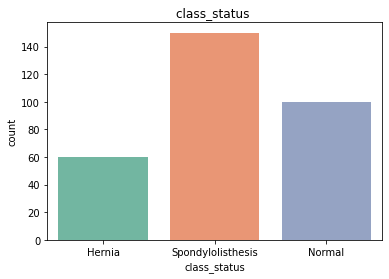

In [5]:
# Jumlah data untuk masing-masing class
sns.countplot(data["class_status"], palette="Set2")
plt.title("class_status ")
plt.show()

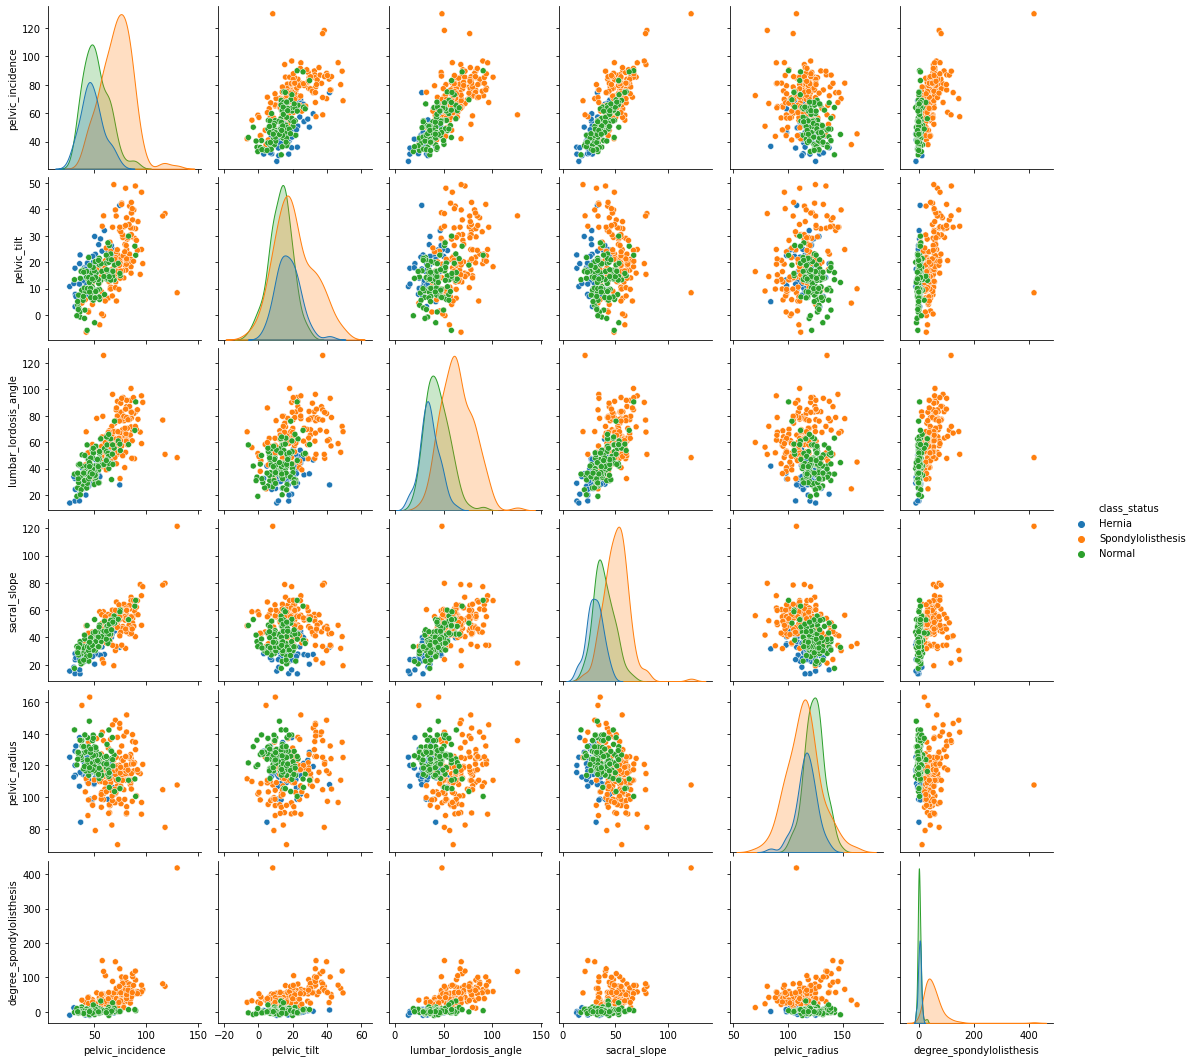

In [6]:
# Seaborn Pairplot
sns.pairplot(data=data, hue='class_status')
plt.show()

# PREPROCESSING DATA

In [7]:
# Memisahkan dataset menjadi x dan y
x,y = data.loc[:,data.columns!='class_status'],data.loc[:,'class_status']

In [8]:
# Normalisasi data
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))
x_scaled

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240


In [9]:
# Setelah dataset dibagi menjadi x = atribut dan y = class kemudian dipisahkan menjadi data training dan testing menggunakan train_test_split()
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state = 32)

# DECISSION TREE

In [10]:
# Membuat model menggunakan decision tree
dtree = tree.DecisionTreeClassifier()

# Melakukan training dengan dataset train
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
# Melakukan prediksi menggunakan x_test lalu print class hasil prediksi
prediction = dtree.predict(x_test)


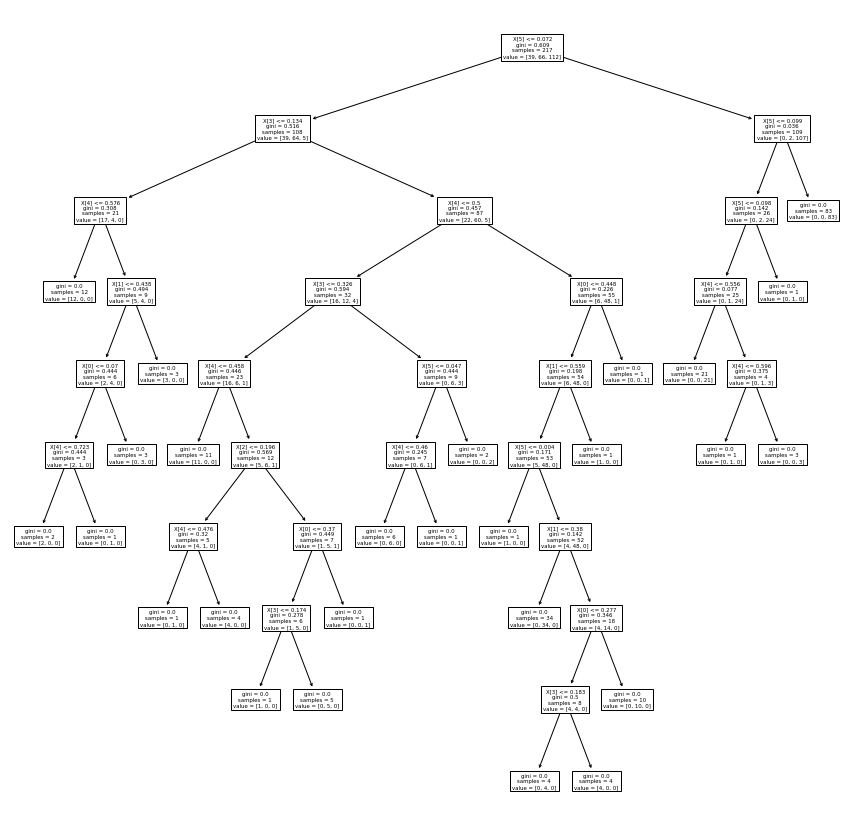

In [12]:
# menampilkan tree hasil training
plt.figure(figsize=(15,15))
tree.plot_tree(dtree) 
plt.show()

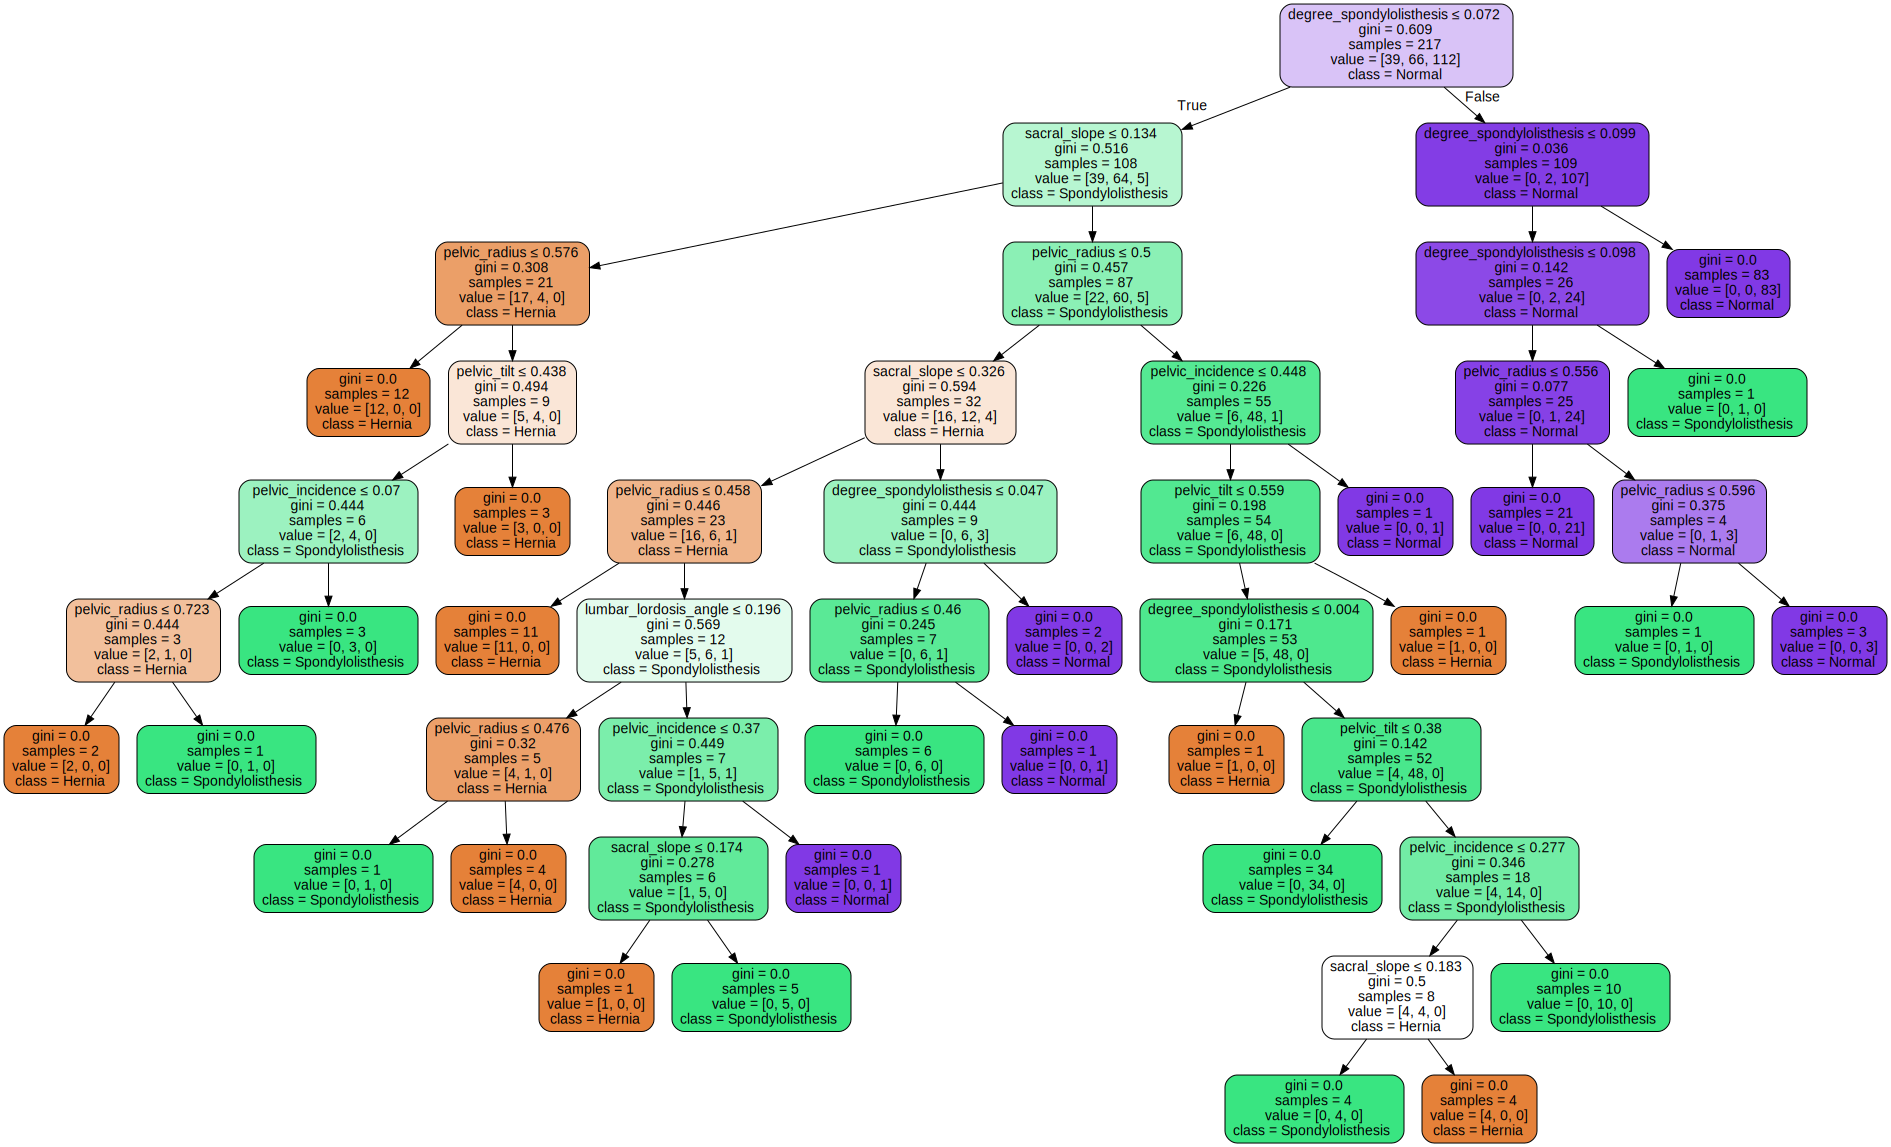

In [13]:
# alternatif menggunakan lib graphviz untuk menampilkan tree
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=x.columns.values.tolist(),  
                                class_names=y.unique(),  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 

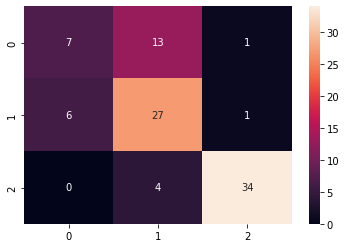

In [14]:
# Munculkan heatmap dari matriks confusion
cf=confusion_matrix(y_test,prediction)
sns.heatmap(cf,annot=True)


In [15]:
# Model Evaluation
print(classification_report(y_test,prediction))

                   precision    recall  f1-score   support

           Hernia       0.54      0.33      0.41        21
           Normal       0.61      0.79      0.69        34
Spondylolisthesis       0.94      0.89      0.92        38

         accuracy                           0.73        93
        macro avg       0.70      0.67      0.67        93
     weighted avg       0.73      0.73      0.72        93



In [16]:
#mengambil f1-Score
f1_DeTree = f1_score(y_test, prediction, average='weighted')

# RANDOM FOREST

In [33]:
# Membuat prediksi dengan Random forest
randforest = RandomForestClassifier(ntree=100)

# Lakukan training dengan dataset train
randforest.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
# Melakukan prediksi menggunakan x_test lalu print class hasil prediksi
prediction = randforest.predict(x_test)


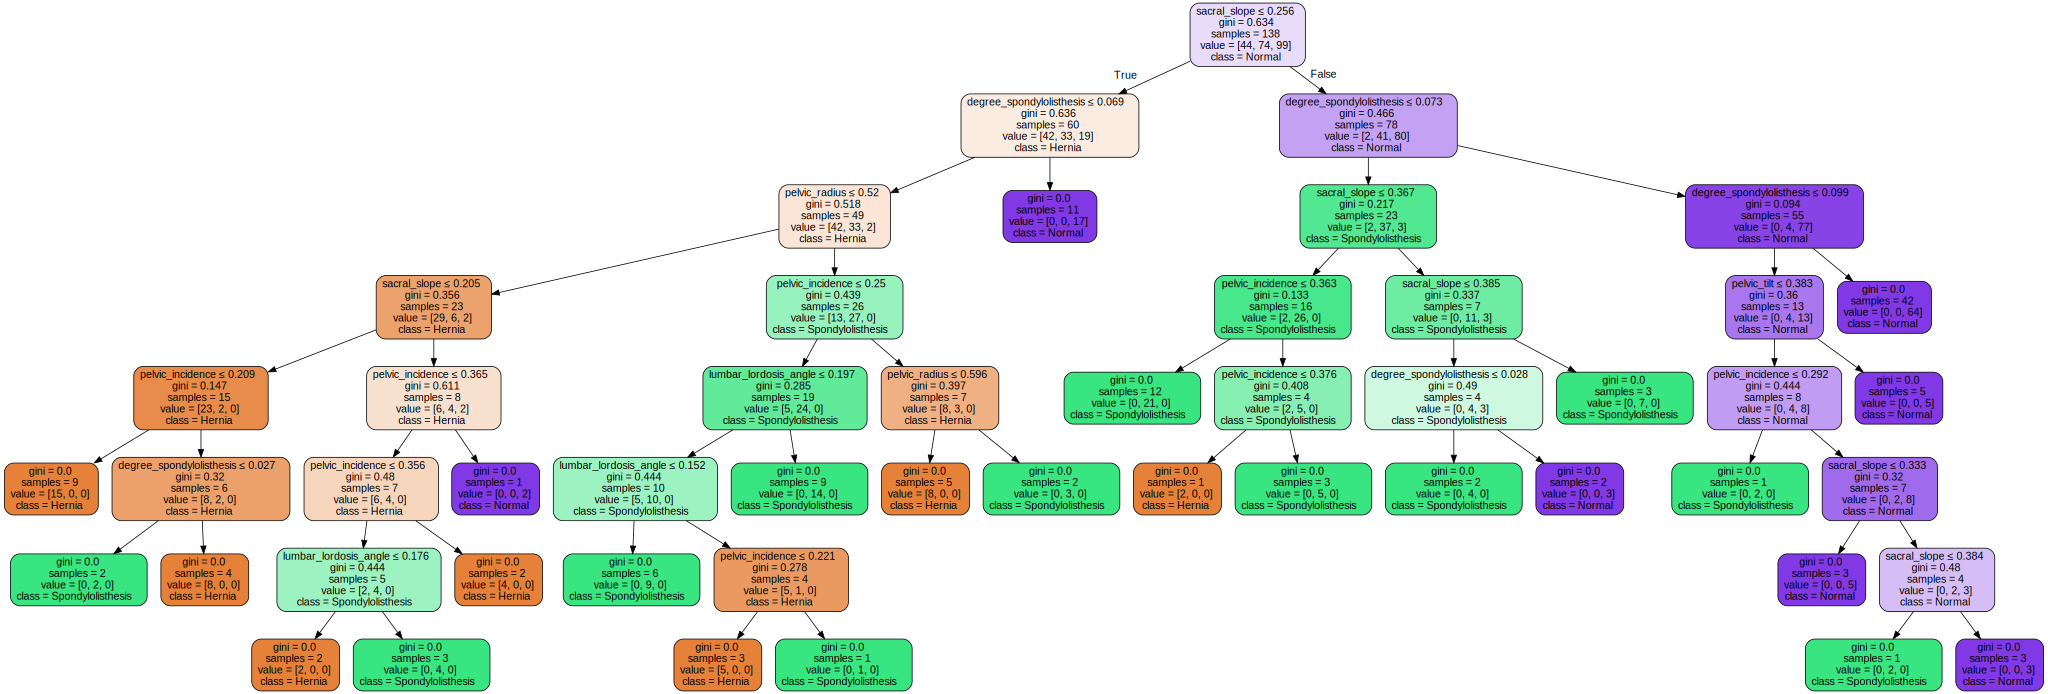

In [19]:
# alternatif menggunakan lib graphviz untuk menampilkan Random forest
# random forest terdiri dari banyak tree oleh sebab itu tidak bs dimunculkan semua
dot_data = tree.export_graphviz(randforest.estimators_[1], out_file=None, 
                                feature_names=x.columns.values.tolist(),  
                                class_names=y.unique(),  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 


In [20]:
# Matriks confusion array
print(classification_report(y_test,prediction))

                   precision    recall  f1-score   support

           Hernia       0.64      0.43      0.51        21
           Normal       0.69      0.85      0.76        34
Spondylolisthesis       1.00      0.97      0.99        38

         accuracy                           0.81        93
        macro avg       0.78      0.75      0.75        93
     weighted avg       0.81      0.81      0.80        93



In [21]:
#mengambil f1-Score
f1_RandForest = f1_score(y_test, prediction, average='weighted')

# SUPER VECTOR MACHINE

In [22]:
# Membuat model menggunakan support vector machine
svm = svm.SVC(kernel='poly')

# Melakukan training dengan dataset train
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [23]:
# Melakukan prediksi menggunakan x_test
prediction=svm.predict(x_test)

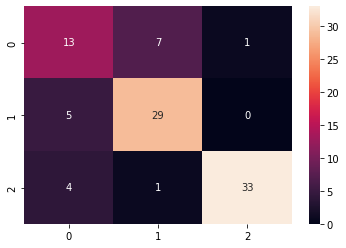

In [24]:
# Menampilkan heatmap dari matriks confusion
sns.heatmap(confusion_matrix(y_test,prediction), annot=True)

In [25]:
# Model Evaluation
print(classification_report(y_test,prediction))

                   precision    recall  f1-score   support

           Hernia       0.59      0.62      0.60        21
           Normal       0.78      0.85      0.82        34
Spondylolisthesis       0.97      0.87      0.92        38

         accuracy                           0.81        93
        macro avg       0.78      0.78      0.78        93
     weighted avg       0.82      0.81      0.81        93



In [26]:
#mengambil f1-Score
f1_SVM = f1_score(y_test, prediction, average='weighted')

# **Bar Plot F1-Score Untuk tiap model**

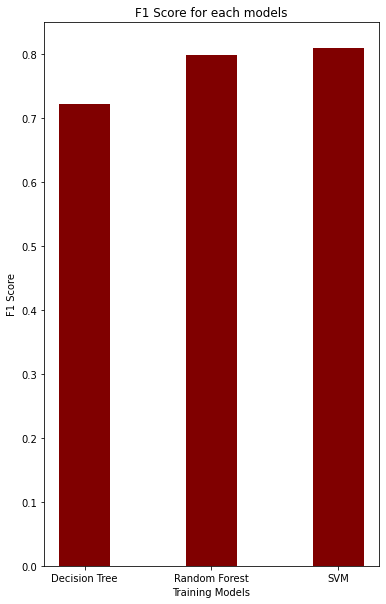

In [31]:
data = {"Decision Tree":f1_DeTree, "Random Forest":f1_RandForest, "SVM":f1_SVM}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 10))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Training Models")
plt.ylabel("F1 Score")
plt.title("F1 Score for each models")
plt.show()